## GEARS only performance comparison to multiple null models (Dixit)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
sns.set( font = "Helvetica" )
api = wandb.Api()


# Project is specified by <entity/project-name> please replace it with your project name here:
# runs = api.runs("kexinhuang/pert_gnn_simulation_" + data_name)
runs = api.runs("yroohani/dixit")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [2]:
### Make sure the run names match exactly with the wandb names!!

run = 6
pertnet_runs = ['preprint_benchmark_gears_' + str(i) for i in range(1, run)]
no_perturb_runs = ['preprint_benchmark_no_perturb' + str(i) for i in range(1, run)]
median_baseline_runs = ['median_' + str(i) for i in range(1, run)]
mean_baseline_runs = ['mean_' + str(i) for i in range(1, run)]

In [3]:
res_df = runs_df[runs_df.name.isin(pertnet_runs + no_perturb_runs + median_baseline_runs + mean_baseline_runs)]

In [4]:
res_df

,summary,config,name
0,"{'test_combo_seen1_pearson_de': 'NaN', 'test_c...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_2
1,"{'test_combo_seen1_pearson': 'NaN', 'test_comb...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_3
2,"{'test_combo_seen0_mse_de': 'NaN', 'test_combo...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_4
3,"{'test_de_pearson': 0.8236402725164101, 'test_...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_5
4,{'test_frac_opposite_direction_top20_non_dropo...,"{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_5
5,"{'test_mse': 0.0011950701009482143, 'test_comb...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_4
6,{'test_unseen_single_mse_top20_de_non_dropout'...,"{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_3
7,"{'test_combo_seen1_pearson': 'NaN', 'test_comb...","{'G_go': None, 'device': 'cuda:5', 'num_genes'...",mean_1
8,"{'test_combo_seen2_mse_de': 'NaN', 'test_combo...","{'G_go': None, 'device': 'cuda:5', 'num_genes'...",mean_2
9,{'test_unseen_single_mse': 0.00215454539284110...,"{'G_go': None, 'device': 'cuda:5', 'num_genes'...",median_1


In [5]:
def normalize_name(x):
    if x in pertnet_runs:
        return 'GEARS'
    elif x in median_baseline_runs:
        return 'Median-Baseline'
    elif x in mean_baseline_runs:
        return 'Mean-Baseline'
    else:
        return 'No-Perturb'

In [6]:
metrics = ['test_mse_top20_de_non_dropout', 'test_pearson_delta']
metrics_name_map = {'test_mse_top20_de_non_dropout': 'Top 20 DE MSE',
                   'test_pearson_delta': 'Pearson Correlation Across All Genes'}
out = {}
out['method'] = [normalize_name(i) for i in res_df.name.values]
for m in metrics:
    out[metrics_name_map[m]] = res_df.summary.apply(lambda x: x[m])
out = pd.DataFrame(out)

In [7]:
color_pal = {
'GEARS': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
'No-Perturb': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
'Median-Baseline': (0.4, 0.7607843137254902, 0.6470588235294118),
'Mean-Baseline': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)}

In [8]:
pal_order = [color_pal[i] for i in pd.DataFrame(out).method.unique()]

In [9]:
import numpy as np
normalize = np.mean(out[out.method == 'No-Perturb']['Top 20 DE MSE'])
out['Normalized MSE of Top 20 DE Genes'] = out['Top 20 DE MSE'].values/normalize

In [10]:
out

,method,Top 20 DE MSE,Pearson Correlation Across All Genes,Normalized MSE of Top 20 DE Genes
0,Median-Baseline,0.133349,-0.062239,1.483296
1,Median-Baseline,0.183987,-0.358935,2.046557
2,Median-Baseline,0.069717,0.308303,0.775488
3,Median-Baseline,0.156465,-0.077968,1.740423
4,Mean-Baseline,0.079243,-0.007979,0.881454
5,Mean-Baseline,0.072385,0.319558,0.805170
6,Mean-Baseline,0.084443,0.553096,0.939295
7,Mean-Baseline,0.066420,0.036689,0.738815
8,Mean-Baseline,0.070872,0.003574,0.788333
9,Median-Baseline,0.130217,-0.046260,1.448454


In [16]:
means = out.groupby('method').mean().loc[:, 'Normalized MSE of Top 20 DE Genes']
print((means['Mean-Baseline'] - means['GEARS'])/means['Mean-Baseline'])
print((means['Median-Baseline'] - means['GEARS'])/means['Mean-Baseline'])

0.5349857360617769
1.33948745687588


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Dixit')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


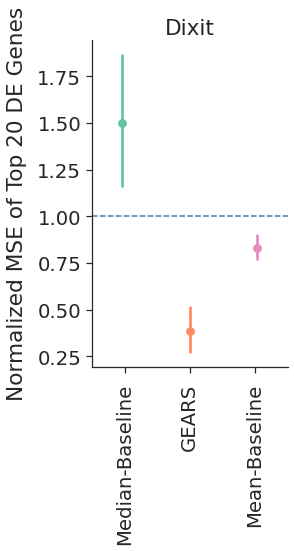

In [11]:
sns.set(rc={'figure.figsize':(3.5,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.pointplot('method', 'Normalized MSE of Top 20 DE Genes', 
    data=pd.DataFrame(out), 
    order = ['Median-Baseline', 'GEARS', 'Mean-Baseline'], 
    hue = 'method',
    palette=[color_pal['Median-Baseline'], color_pal['GEARS'], color_pal['Mean-Baseline']],              
    dodge=True, 
    join=False,
    hue_order = ['Median-Baseline', 'GEARS', 'Mean-Baseline'])
sns.despine()
g.legend_.remove()
g.set(xlabel=None)
g.axhline(1, linestyle="dashed")

plt.ylabel("Normalized MSE of Top 20 DE Genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
plt.xticks(rotation=90)

plt.title('Dixit')